In [1]:
#reading the dataset into pandas dataframe
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv('train_LZdllcl.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [2]:
df.shape

(54808, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

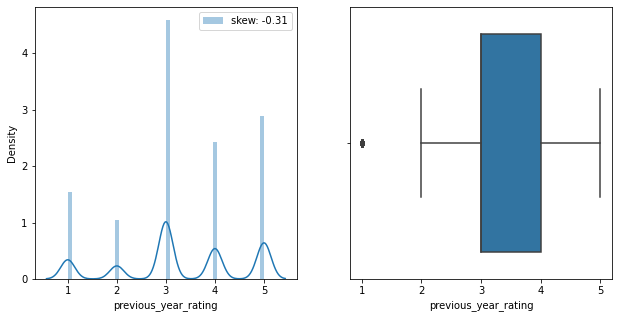

In [21]:
#null values are present in education and previous_year_rating fields
#handling nulls in previous_year_rating fields

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16,5))
plt.subplot(131)
sns.distplot(df['previous_year_rating'],label='skew: '+ str(np.round(df['previous_year_rating'].skew(),2)))
plt.legend()
plt.subplot(132)
sns.boxplot(df['previous_year_rating'])
plt.show()

In [25]:
#graph is  almost normally distributed, so we can fill the null with median or mean
df['previous_year_rating']=df['previous_year_rating'].fillna(df['previous_year_rating'].median())

In [26]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [29]:
#since education having null values for only 2409 fields, we can delete that
df.dropna(inplace=True)

In [30]:
df.shape

(52399, 14)

In [31]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [48]:
#dropping employee id fields as it wont contribute in the model
df.drop('employee_id',axis=1,inplace=True)

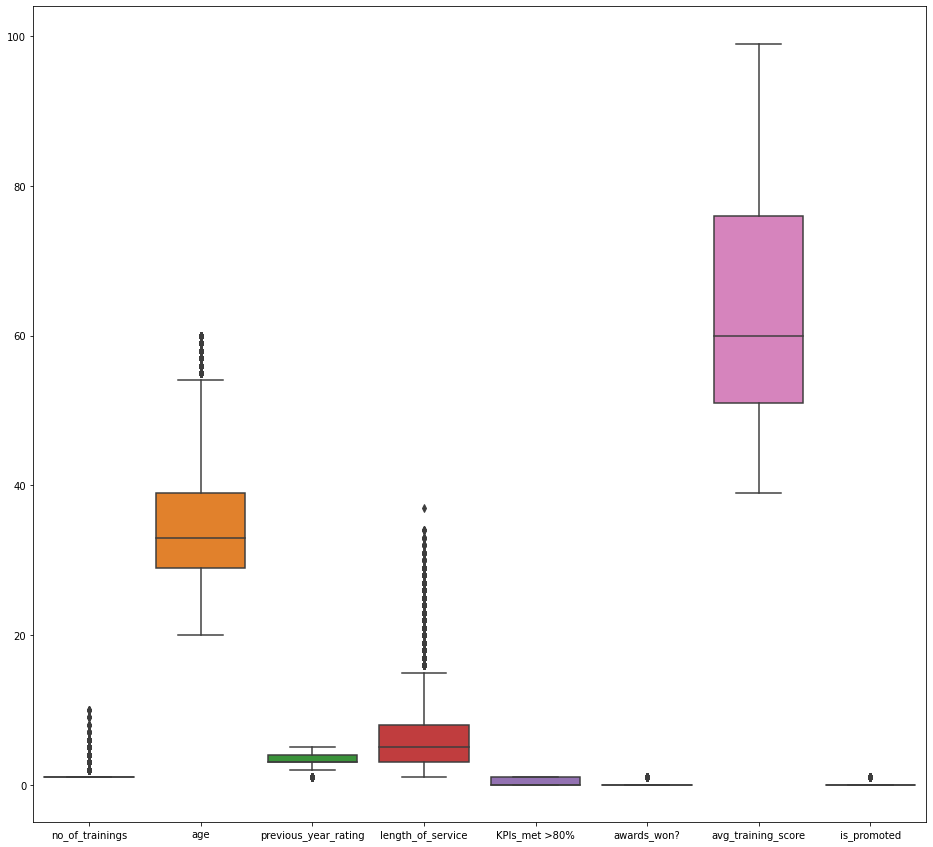

In [53]:
#handling outliers
plt.figure(figsize=(16,15))
sns.boxplot(data=df)
plt.show()


from the graph its clear that there is no major outliers present 

In [57]:
#Encoding the fields
enc_fields = df.select_dtypes(include='object')

In [58]:
enc_fields

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54802,Sales & Marketing,region_14,Bachelor's,m,other
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other


In [61]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()

for i in enc_fields.columns:
    df[i]=en.fit_transform(df[i])

In [62]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,8,18,0,1,0,1,45,3.0,2,0,0,73,0


## Modelling

In [105]:
#splitting the dataset into X and y
X=df.drop('is_promoted',axis=1)
y=df['is_promoted']

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [106]:
#importing train_test_split and creating train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [90]:
df1= pd.read_csv('test_2umaH9m.csv')

In [91]:
df_t=df1.drop('employee_id',axis=1)

In [92]:
df_t.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [93]:
enc_fields1 = df_t.select_dtypes(include='object')
for i in enc_fields1.columns:
    df_t[i]=en.fit_transform(df_t[i])

In [94]:
df_t.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,18,0,1,2,1,24,NaN,1,1,0,77
1,2,28,0,0,0,1,31,3.0,5,0,0,51
2,7,4,0,1,0,1,31,1.0,4,0,0,47
3,5,11,0,0,0,3,31,2.0,9,0,0,65
4,1,21,0,1,2,1,30,4.0,7,0,0,61


In [107]:
#creating the empty list to display the accuracy and f1 score after running all models
models=['RandomForest','LogisticRegression','DecisionTree','SVC','KNN','BernoulliNB']
model_test_acc=[]
model_test_f1_score = []
model_test_precision_score =[]
model_test_recall_score =[]

In [108]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred),3)
test_f1 =  np.round(f1_score(y_test,y_pred,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
#model_test_precision_score(test_prec)
#model_test_recall_score(test_recall)

print("F1 Score on test data using RandomForest tree: ",test_f1)
print("Accuracy Score on test data using RandomForest tree: ",test_acc)
#print("Recall score on  test data using RandomForest tree: ",test_prec)
#print("Precision score on test data using RandomForest tree: ",test_recall)

F1 Score on test data using RandomForest tree:  0.92
Accuracy Score on test data using RandomForest tree:  0.935


In [109]:
test_prec = np.round(recall_score(y_test, y_pred,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred,average='weighted'),3)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)
print("Recall score on  test data using RandomForest tree: ",test_prec)
print("Precision score on test data using RandomForest tree: ",test_recall)

Recall score on  test data using RandomForest tree:  0.935
Precision score on test data using RandomForest tree:  0.931


In [110]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred1),3)
test_f1 =  np.round(f1_score(y_test,y_pred1,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred1,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred1,average='weighted'),3)

model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)


print("F1 Score on test data using LogisticRegression: ",test_f1)
print("Accuracy Score on test data using LogisticRegression: ",test_acc)
print("Recall score on  test data using LogisticRegression : ",test_prec)
print("Precision score on test data using LogisticRegression : ",test_recall)

F1 Score on test data using LogisticRegression:  0.887
Accuracy Score on test data using LogisticRegression:  0.915
Recall score on  test data using LogisticRegression :  0.915
Precision score on test data using LogisticRegression :  0.89


In [111]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred2 = tree.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred2),3)
test_f1 =  np.round(f1_score(y_test,y_pred2,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred2,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred2,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)

print("F1 Score on test data using DecisionTree: ",test_f1)
print("Accuracy Score on test data using DecisionTree: ",test_acc)
print("Recall score on  test data using DecisionTree : ",test_prec)
print("Precision score on test data using DecisionTree : ",test_recall)

F1 Score on test data using DecisionTree:  0.896
Accuracy Score on test data using DecisionTree:  0.894
Recall score on  test data using DecisionTree :  0.894
Precision score on test data using DecisionTree :  0.898


In [112]:
svm= SVC()
svm.fit(X_train,y_train)
y_pred3 = svm.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred3),3)
test_f1 =  np.round(f1_score(y_test,y_pred3,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred3,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred3,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)

print("F1 Score on test data using SVM: ",test_f1)
print("Accuracy Score on test data using SVM: ",test_acc)
print("Recall score on  test data using SVM : ",test_prec)
print("Precision score on test data using SVM : ",test_recall)

F1 Score on test data using SVM:  0.872
Accuracy Score on test data using SVM:  0.913
Recall score on  test data using SVM :  0.913
Precision score on test data using SVM :  0.834


In [113]:
accuracy = []
neighbors = np.arange(1,12)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred4 = classifier.predict(X_test)
    acc = accuracy_score(y_pred4,y_test)
    accuracy.append(acc)

In [114]:
accuracy

[0.8808206106870229,
 0.9185114503816794,
 0.9152671755725191,
 0.9235687022900764,
 0.9224236641221374,
 0.925,
 0.9250954198473282,
 0.9245229007633587,
 0.9251908396946565,
 0.9241412213740458,
 0.9247137404580152]

<AxesSubplot:>

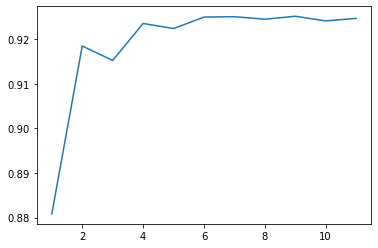

In [115]:
sns.lineplot(x=neighbors,y=accuracy)

In [116]:
#Since accuracy score is good for 9, we can select 9 as k

classifier = KNeighborsClassifier(n_neighbors=9, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred5 = classifier.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred5),3)
test_f1 =  np.round(f1_score(y_test,y_pred5,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred5,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred5,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)

print("F1 Score on test data using KNN: ",test_f1)
print("Accuracy Score on test data using KNN: ",test_acc)
print("Recall score on  test data using SVM : ",test_prec)
print("Precision score on test data using SVM : ",test_recall)

F1 Score on test data using KNN:  0.9
Accuracy Score on test data using KNN:  0.925
Recall score on  test data using SVM :  0.925
Precision score on test data using SVM :  0.925


In [117]:
 # Applying Bernoulli Naive Bayes Classifier
    
from sklearn.naive_bayes import BernoulliNB
classifier= BernoulliNB()
classifier.fit(X_train, y_train)
y_predd= classifier.predict(X_test)

test_acc =  np.round(accuracy_score(y_test,y_predd),3)
test_f1 =  np.round(f1_score(y_test,y_predd,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_predd,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_predd,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)

print("F1 Score on test data using KNN: ",test_f1)
print("Accuracy Score on test data using KNN: ",test_acc)
print("Recall score on  test data using SVM : ",test_prec)
print("Precision score on test data using SVM : ",test_recall)

F1 Score on test data using KNN:  0.882
Accuracy Score on test data using KNN:  0.912
Recall score on  test data using SVM :  0.912
Precision score on test data using SVM :  0.878


In [118]:
#displaying the accuracy and f1 score of each models
model_performance = pd.DataFrame({
    'model':models,
    'f1_score':model_test_f1_score,
    'accuracy':model_test_acc,
    'Recall_score':model_test_precision_score,
    'Precision_score':model_test_recall_score,
})
model_performance

,model,f1_score,accuracy,Recall_score,Precision_score
0,RandomForest,0.920,0.935,0.935,0.931
1,LogisticRegression,0.887,0.915,0.915,0.890
2,DecisionTree,0.896,0.894,0.894,0.898
3,SVC,0.872,0.913,0.913,0.834
4,KNN,0.900,0.925,0.925,0.925
5,BernoulliNB,0.882,0.912,0.912,0.878


### selecting random forest as the best model as per the scores

In [123]:
df_t.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,18,0,1,2,1,24,NaN,1,1,0,77
1,2,28,0,0,0,1,31,3.0,5,0,0,51
2,7,4,0,1,0,1,31,1.0,4,0,0,47
3,5,11,0,0,0,3,31,2.0,9,0,0,65
4,1,21,0,1,2,1,30,4.0,7,0,0,61


In [125]:
df_t.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

<AxesSubplot:xlabel='KPIs_met >80%', ylabel='previous_year_rating'>

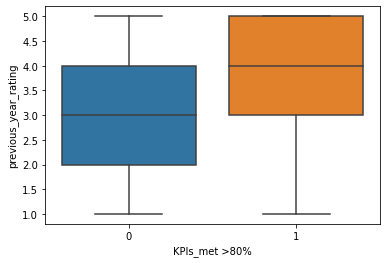

In [128]:
sns.boxplot(data=df_t,x='KPIs_met >80%',y='previous_year_rating')

In [132]:
df_t['previous_year_rating']=df_t['previous_year_rating'].fillna(df_t['previous_year_rating'].median())

In [133]:
df_t.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [134]:
res = rfc.predict(df_t)

In [135]:
res

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [138]:
df_result=pd.DataFrame({'employee_id':df1.employee_id})

In [141]:
df_result['is_promoted']=res

In [146]:
df_result.to_csv('Results.csv')

trying with KNN model

In [147]:
df_result_KNN=pd.DataFrame({'employee_id':df1.employee_id})

In [151]:
res1 = classifier.predict(df_t)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [155]:
df_result_KNN['is_promoted']=res1

In [156]:
df_result_KNN.to_csv('Results_KNN.csv')